1. Import releavant packages and the dataset (Diabetes.csv)

In [1]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, matthews_corrcoef
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('diabetes.csv')

2. Separate the dependent and independent variables

In [2]:
X = df.copy()
X.drop('Outcome',axis=1,inplace=True)
y = df['Outcome'].copy()

3. Split the dataset into training and testing portion

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

4. Create a XGBoost Model and predict the test set.

In [4]:
clf = xgb.XGBClassifier(objective='binary:logistic', seed = 0,early_stopping_rounds =10,eval_metric='aucpr')
clf.fit(X_train,
        y_train,
        eval_set=[(X_test,y_test)])
                                                    
y_predicted = clf.predict(X_test)

[0]	validation_0-aucpr:0.63533
[1]	validation_0-aucpr:0.68222
[2]	validation_0-aucpr:0.68714
[3]	validation_0-aucpr:0.69260
[4]	validation_0-aucpr:0.69279
[5]	validation_0-aucpr:0.68855
[6]	validation_0-aucpr:0.69562
[7]	validation_0-aucpr:0.66525
[8]	validation_0-aucpr:0.66066
[9]	validation_0-aucpr:0.65780
[10]	validation_0-aucpr:0.65846
[11]	validation_0-aucpr:0.66108
[12]	validation_0-aucpr:0.65784
[13]	validation_0-aucpr:0.65470
[14]	validation_0-aucpr:0.65782
[15]	validation_0-aucpr:0.65167
[16]	validation_0-aucpr:0.64844


5. Create Confusion Matrix

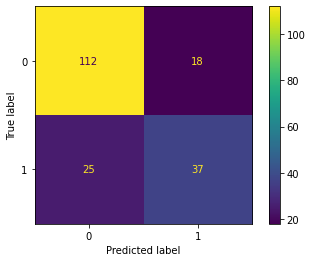

In [5]:
cm = confusion_matrix(y_test,y_predicted)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm)
cmd.plot()
plt.show()

6. Display Matthews Correlation Coefficient

In [6]:
matthews_corrcoef(y_test,y_predicted)

0.47401025972993394